In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
dataframe = pd.read_csv('data/benchmark/benchmark_table_times_10_old.csv', index_col=0)
# dataframe = pd.read_csv('data/benchmark/benchmark_table_times_1.csv', index_col=0)

display(dataframe)

,i_bench,T,scenario,i_budget,benchmark_eig,mean_wall_time,std_wall_time
0,1,10,dn,1,2.211451,0.017579,0.069308
1,1,15,dn,1,2.207825,0.002238,0.000163
2,1,25,dn,1,2.207825,0.002261,0.000145
3,1,39,dn,1,2.207825,0.002221,0.000236
4,1,63,nmc,1,2.207825,0.002315,0.000099
...,...,...,...,...,...,...,...
367,1,100000,nmc,4,3.607797,0.151456,0.045718
368,1,100000,nmc_reuse,4,3.622910,750.993829,46.423327
369,1,100000,dn,4,3.600788,0.152680,0.033732
370,1,100000,var_marg,4,3.617127,221.785887,12.470035


In [15]:
n_fwd_sample_list = dataframe['T'].unique()

In [16]:
colour_dict = {'nmc': 'black', 'nmc_reuse': 'grey',
               'dn': 'tab:pink', 'var_marg': 'cyan',
               'var_post': 'orange',
               'nce': 'tab:red'}

marker_dict = {'nmc': '8', 'nmc_reuse': 's',
               'dn': 'p', 'var_marg': 'P',
               'var_post': '*',
               'nce': 'X'}

label_dict = {'nmc': 'NMC', 'nmc_reuse': r'$\mathrm{NMC}_\mathrm{re}$',
              'dn':  r'$D_N$', 'var_marg': 'Var Marg',
              'var_post': 'Var Post',
              'nce': 'infoNCE'}

#
scenarios = ['nmc', 'nmc_reuse', 'dn', 'var_marg', 'var_post', 'nce']
# scenarios = ['nmc', 'nmc_reuse', 'dn', 'var_marg', 'var_post']


In [17]:
i_budget = 2
scenario = 'nmc_reuse'
 
local_df = dataframe[(dataframe['i_budget'] == i_budget) & (dataframe['scenario'] == scenario)]
local_df = local_df.drop(columns=['i_bench', 'i_budget', 'scenario'])
local_df = local_df.reset_index(drop=True)

local_T = local_df['T'].unique()

local_results = local_df.groupby(by=["T"]).agg(['mean', 'min', 'max', 'std'])

display(local_df)

,T,benchmark_eig,mean_wall_time,std_wall_time
0,63,2.765056,0.013980,0.000256
1,100,2.760312,0.021922,0.001036
2,158,2.880526,0.031911,0.001545
3,251,2.866350,0.036818,0.001082
4,398,2.956198,0.056868,0.001824
5,630,2.921149,0.087790,0.003567
6,1000,2.976156,0.142433,0.005454
7,1584,2.974912,0.234875,0.006584
8,2511,2.974912,0.406248,0.028354
9,3981,2.887444,0.727057,0.033412


In [18]:
n_random_benchmarks = 1000
T_benchmark = int(1e5)

random_benchmarks = np.load(f'data/benchmark/srcloc_benchmark_random_designs_{n_random_benchmarks}_{T_benchmark}.npy', allow_pickle=True)

In [19]:
random_benchmarks.shape

(4, 1001)

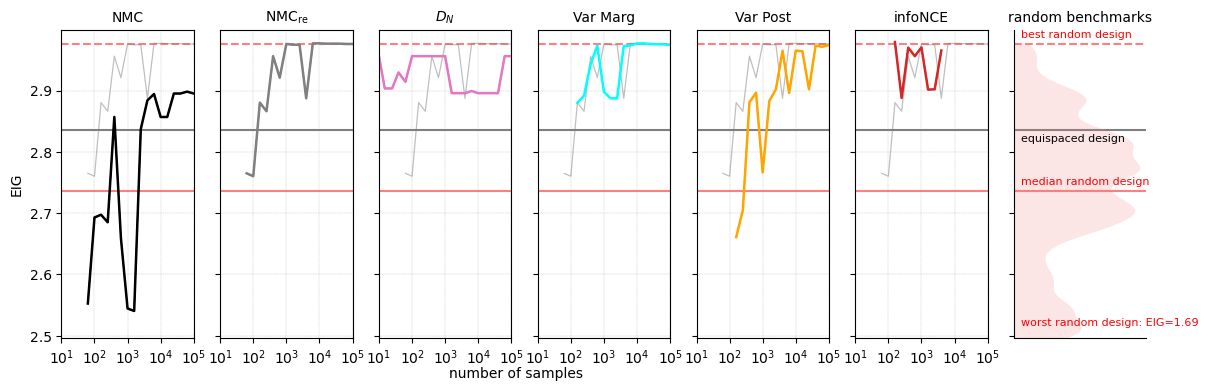

In [20]:
i_budget = 2

fig, ax_dict = plt.subplot_mosaic(
        [[str(scenario) for scenario in scenarios] + ['random_benchmark']],
    figsize=(14,4), sharex=False, sharey=True)

s  = 12
lw = 1.8

min_random_benchmark    = np.min(random_benchmarks[i_budget-1, :-1])
max_random_benchmark    = np.max(random_benchmarks[i_budget-1, :-1])
median_random_benchmark = np.median(random_benchmarks[i_budget-1, :-1])
heurist_benchmark       = random_benchmarks[i_budget-1, -1]

random_bottom = max_random_benchmark - 2*(max_random_benchmark - median_random_benchmark)


local_df = dataframe[(dataframe['i_budget'] == i_budget) & (dataframe['scenario'] == 'nmc_reuse')]
local_df = local_df.drop(columns=['i_bench', 'i_budget', 'scenario'])
local_df = local_df.reset_index(drop=True)
benchmark_T = local_df['T'].unique()
local_results = local_df.groupby(by=["T"]).agg(['mean', 'min', 'max', 'std'])
benchmark_mean = local_results['benchmark_eig']['mean'].to_numpy()
benchmark_min  = local_results['benchmark_eig']['min'].to_numpy()
benchmark_max  = local_results['benchmark_eig']['max'].to_numpy()

for scenario in scenarios:
    
    ax = ax_dict[str(scenario)]
    
    local_df = dataframe[(dataframe['i_budget'] == i_budget) & (dataframe['scenario'] == scenario)]
    local_df = local_df.drop(columns=['i_bench', 'i_budget', 'scenario'])
    local_df = local_df.reset_index(drop=True)

    local_T = local_df['T'].unique()

    local_results = local_df.groupby(by=["T"]).agg(['mean', 'min', 'max', 'std'])
    local_mean = local_results['benchmark_eig']['mean'].to_numpy()
    local_min  = local_results['benchmark_eig']['min'].to_numpy()
    local_max  = local_results['benchmark_eig']['max'].to_numpy()
    local_std  = local_results['benchmark_eig']['std'].to_numpy()

    ax.plot(benchmark_T, benchmark_mean, color=colour_dict['nmc_reuse'], lw=lw*0.5, linestyle='-', alpha=0.5)
#     ax.fill_between(benchmark_T, benchmark_mean, benchmark_min, facecolor=colour_dict['nmc_reuse'], alpha=0.05,)
#     ax.fill_between(benchmark_T, benchmark_mean, benchmark_max, facecolor=colour_dict['nmc_reuse'], alpha=0.05,)
#     ax.plot(benchmark_T, benchmark_min, color=colour_dict['nmc_reuse'], lw=lw*0.5, linestyle='--', alpha=0.2)
#     ax.plot(benchmark_T, benchmark_max, color=colour_dict['nmc_reuse'], lw=lw*0.5, linestyle='--', alpha=0.2)
    
    ax.plot(local_T, local_mean, color=colour_dict[scenario], label=label_dict[scenario], lw=lw)

    ax.plot(local_T, local_min, color=colour_dict[scenario], label=label_dict[scenario], lw=lw*0.5, alpha=0.5)
    ax.plot(local_T, local_max, color=colour_dict[scenario], label=label_dict[scenario], lw=lw*0.5, alpha=0.5)

    # ax.fill_between(local_T, local_mean, local_mean+local_std, facecolor=colour_dict[scenario], alpha=0.2)
    # ax.fill_between(local_T, local_mean, local_mean-local_std, facecolor=colour_dict[scenario], alpha=0.2)
    ax.fill_between(local_T, local_mean, local_min, facecolor=colour_dict[scenario], alpha=0.1)
    ax.fill_between(local_T, local_mean, local_max, facecolor=colour_dict[scenario], alpha=0.1)
    
    ax.set_xlim(1e1, 1e5)
    
    ax.set_ylim(bottom=random_bottom)
    
    ax.set_xscale('log',base=10)
#     ax.set_xlabel('number of samples')
        
    ax.axhline(heurist_benchmark, color='black', zorder=-5, alpha=0.5, linewidth=1.5)
    ax.axhline(max_random_benchmark, color='red', linestyle='--', zorder=-5, alpha=0.5, linewidth=1.5)
    # ax.axhline(min_random_benchmark, color='red', linestyle='--', zorder=-5, alpha=0.5, linewidth=1.5)
    ax.axhline(median_random_benchmark, color='red', linestyle='-', zorder=-5, alpha=0.5, linewidth=1.5)
    
    # ax.legend(fontsize=10)
    # ax.legend(loc='lower left')
    ax.set_xticks([1e1, 1e2, 1e3, 1e4, 1e5])
    ax.grid(axis='x', color='gray', linewidth=0.3, alpha=0.5, zorder=-10, linestyle='--')
    ax.grid(axis='y', color='gray', linewidth=0.3, alpha=0.5, zorder=-10, linestyle='--')    
    
    ax.set_title(label_dict[scenario], fontsize=10)
    
ax_dict['nmc'].set_ylabel('EIG')

ax = ax_dict['random_benchmark']

#ste transparent background
ax.patch.set_alpha(0.0)

sns.kdeplot(y=random_benchmarks[i_budget-1, :-1], ax=ax, label='random designs', 
            color='lightcoral', linewidth=0, alpha=0.2, bw_adjust=0.4, cut=0,
            fill=True)

for spine in ['top', 'right',]:
    ax.spines[spine].set_visible(False)
    
ax.axhline(heurist_benchmark, color='black', zorder=-5, alpha=0.5, linewidth=1.5)
ax.axhline(max_random_benchmark, color='red', linestyle='--', zorder=-5, alpha=0.5, linewidth=1.5)
# ax.axhline(min_random_benchmark, color='red', linestyle='--', zorder=-5, alpha=0.5, linewidth=1.5)
ax.axhline(median_random_benchmark, color='red', linestyle='-', zorder=-5, alpha=0.5, linewidth=1.5)

ax.text(0.2, heurist_benchmark-0.03*(ax.get_ylim()[1]-ax.get_ylim()[0]),
        'equispaced design', ha='left', va='center', fontsize=8,)
ax.text(0.2, median_random_benchmark+0.03*(ax.get_ylim()[1]-ax.get_ylim()[0]),
        'median random design', color='red', ha='left', va='center', fontsize=8)
ax.text(0.2, max_random_benchmark+0.03*(ax.get_ylim()[1]-ax.get_ylim()[0]),
        'best random design', color='red', ha='left', va='center', fontsize=8)
ax.text(0.2, random_bottom+0.05*(ax.get_ylim()[1]-ax.get_ylim()[0]),
        f'worst random design: EIG={min_random_benchmark:.2f}', color='red', ha='left', va='center', fontsize=8)

ax.set_xticks([])
ax.set_xlabel('')
ax.set_title('random benchmarks', fontsize=10)

fig.text(0.45, 0.02, 'number of samples', ha='center', va='center', fontsize=10)

fig.savefig(f'figures/srcloc_benchmark_eig_{i_budget}_kde.pdf', bbox_inches='tight', dpi=150)
fig.savefig(f'figures/srcloc_benchmark_eig_{i_budget}_kde.png', bbox_inches='tight', dpi=150)

plt.show()

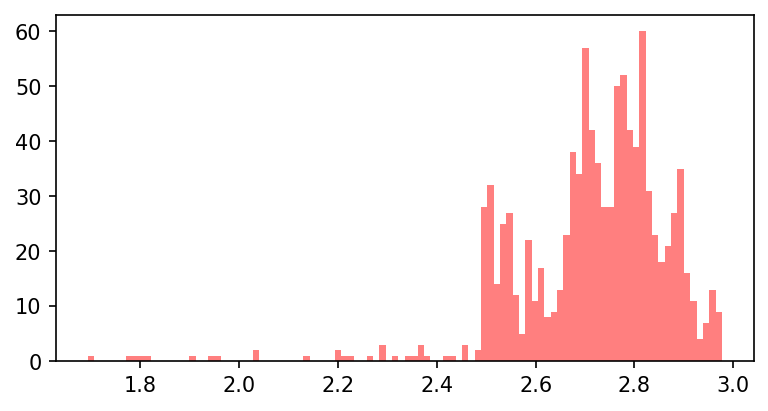

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=150)


ax.hist(random_benchmarks[i_budget-1, :-1], bins=100, color='red', alpha=0.5, label='random designs')

plt.show()

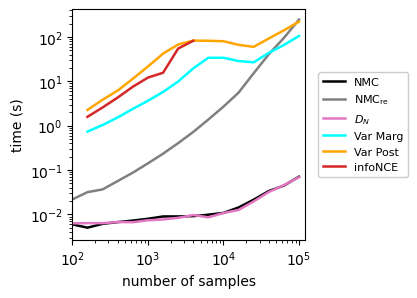

In [22]:
i_budget = 2

fig, ax_dict = plt.subplot_mosaic('a', figsize=(3,3))

s  = 12
lw = 1.8

ax = ax_dict['a']

for scenario in scenarios:
    
    local_df = dataframe[(dataframe['i_budget'] == i_budget) & (dataframe['scenario'] == scenario)]
    local_df = local_df.drop(columns=['i_bench', 'i_budget', 'scenario'])
    local_df = local_df.reset_index(drop=True)

    local_T = local_df['T'].unique()

    local_results = local_df.groupby(by=["T"]).agg(['mean', 'min', 'max', 'std'])

    local_mean = local_results['mean_wall_time']['mean'].to_numpy()
    local_min  = local_results['mean_wall_time']['min'].to_numpy()
    local_max  = local_results['mean_wall_time']['max'].to_numpy()
    local_std  = local_results['mean_wall_time']['std'].to_numpy()

    ax.plot(local_T, local_mean, color=colour_dict[scenario], label=label_dict[scenario], lw=lw)
    ax.fill_between(local_T, local_mean, local_mean+local_std, facecolor=colour_dict[scenario], alpha=0.2)
    ax.fill_between(local_T, local_mean, local_mean-local_std, facecolor=colour_dict[scenario], alpha=0.2)
    
    # ax_dict['a'].plot(scenario_n_samples, scenario_eig, color=colour_dict[scenario],
    #                   lw=2.0, alpha=0.2, zorder=-1,
    #                   marker=None)

    # ax_dict['a'].plot(scenario_n_samples, scenario_eig, color=colour_dict[scenario], label=label_dict[scenario],
    #                   lw=0.0,
                    #   marker=marker_dict[scenario],markerfacecolor='none', markeredgewidth=lw,markersize=s)
    
ax.set_xscale('log',base=10)
ax.set_yscale('log',base=10)

ax.set_xlim(1e2, 1.2e5)

ax.set_xlabel('number of samples')
ax.set_ylabel('time (s)')

# ax.legend(fontsize=10)
# ax.legend(loc='lower left')
ax.legend(loc='center', bbox_to_anchor=(1.25, 0.5), ncol=1, fontsize=8, frameon=True, facecolor='white', framealpha=1)

fig.savefig(f'figures/srcloc_benchmark_times_{i_budget}.pdf', bbox_inches='tight', dpi=150)
fig.savefig(f'figures/srcloc_benchmark_times_{i_budget}.png', bbox_inches='tight', dpi=150)

plt.show()

In [23]:
n_fwd_sample_list

array([    10,     15,     25,     39,     63,    100,    158,    251,
          398,    630,   1000,   1584,   2511,   3981,   6309,  10000,
        15848,  25118,  39810,  63095, 100000])

1000


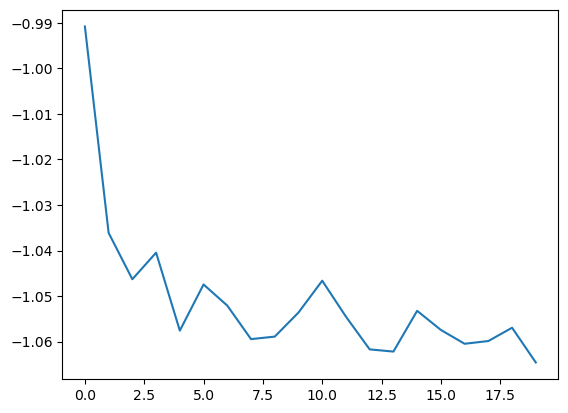

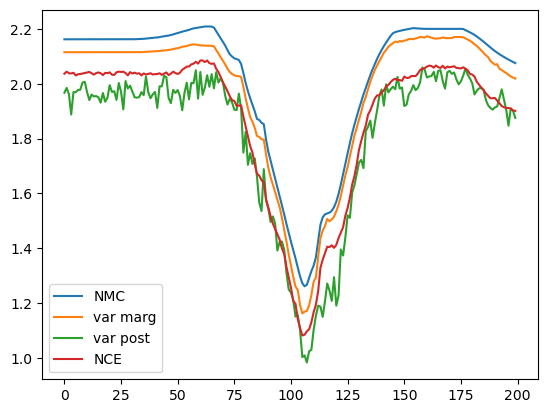

In [24]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

n_benchmark = 1
n_samples = 1000
n_rec = 1

# select closest number of samples
n_samples = n_fwd_sample_list[np.argmin(np.abs(np.array(n_fwd_sample_list) - n_samples))]

print(n_samples)

test_nmc = pickle.load(open(f'../srcloc/data/benchmark/srcloc_methods_{n_benchmark}_nmc_reuse_{100000}.pkl', 'rb'))
test_dn = pickle.load(open(f'../srcloc/data/benchmark/srcloc_methods_{n_benchmark}_dn_{n_samples}.pkl', 'rb'))
test_varmarg = pickle.load(open(f'../srcloc/data/benchmark/srcloc_methods_{n_benchmark}_var_marg_{n_samples}.pkl', 'rb'))
test_varpost = pickle.load(open(f'../srcloc/data/benchmark/srcloc_methods_{n_benchmark}_var_post_{n_samples}.pkl', 'rb'))
test_nce = pickle.load(open(f'../srcloc/data/benchmark/srcloc_methods_{n_benchmark}_nce_{n_samples}.pkl', 'rb'))

plt.plot(test_varmarg[1][1]['info'][100]['test_loss'])
# plt.plot(test_varpost[1][1]['info'][100]['test_loss'])
plt.show()

plt.plot(test_nmc[1][n_rec]['eig'], label='NMC')
# plt.plot(test_dn[1][n_rec]['eig'], label='DN')
plt.plot(test_varmarg[1][n_rec]['eig'], label='var marg')
plt.plot(test_varpost[1][n_rec]['eig'], label='var post')
plt.plot(test_nce[1][n_rec]['eig'], label='NCE')
plt.legend()
plt.show()